# ベイズ拡張Nadaraya-Watson推定

このノートブックでは、既存のNadaraya-Watson推定量をベイズ拡張し、不確実性評価を含む黒曜石産地構成比推定を実行します。

## 1. 環境設定とライブラリのインポート

In [1]:
import sys

sys.path.append("..")

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

japanize_matplotlib.japanize()

# 既存のモジュールとベイズ拡張モジュール
from bayesian_statistics.model3_config import Model3Config, Model3Pipeline
from bayesian_statistics.model3_visualization import ObsidianVisualizer
from bayesian_statistics.model_bayes_nw import BayesianNadarayaWatson

# プロット設定
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

print("ライブラリのインポート完了")

ライブラリのインポート完了


## 2. データの読み込みと前処理

In [ ]:
# データディレクトリの設定
data_dir = "/home/ohta/dev/bayesian_statistics/data/"

# 設定オブジェクトの作成（既存のNW推定量と同じ設定）
config = Model3Config(
    data_dir=data_dir,
    x_min=138,
    x_max=141,
    y_min=34,
    y_max=37,
    nw_sigma=500,
    nw_sigma_for_sites=0.1,
)

# パイプラインの初期化と前処理
pipeline = Model3Pipeline(config)
preprocessor = pipeline.run_preprocessing()

print("\nデータ読み込み完了:")
print(f"  グリッド点数: {len(preprocessor.df_elevation):,}")
print(f"  遺跡数: {len(preprocessor.df_sites)}")
print(f"  使用する共変量: {config.nw_variable_names}")

=== 前処理を開始 ===
データを読み込んでいます...
標高データ: (1357520, 42)
黒曜石データ: (30070, 11)
遺跡データ: (274, 49)

データ読み込み完了:
  グリッド点数: 1,357,520
  遺跡数: 274
  使用する共変量: ['average_elevation', 'average_slope_angle', 'cost_kouzu', 'cost_shinshu', 'cost_hakone', 'cost_takahara', 'cost_river']


## 5. ベイズ推定の実行

In [3]:
# NW推定の実行
bayes_nw = pipeline.run_nadaraya_watson_bayes(preprocessor, alpha_0=10000, gamma_0=1.0)


=== Nadaraya-Watson推定を開始 ===
重み行列を計算しています...
creating weights matrix...


calculating distance_W...
updating weights matrix...
情報: グリッド重み行列に156245760個のNaNを検出（海上部分として保持）

全時期・全産地の推定を実行しています...


時期:   0%|          | 0/5 [00:00<?, ?it/s]

時期0, 産地神津島: 53遺跡
時期0, 産地信州: 53遺跡
時期0, 産地箱根: 53遺跡
時期0, 産地高原山: 53遺跡


時期:  20%|██        | 1/5 [00:35<02:21, 35.45s/it]

時期1, 産地神津島: 61遺跡
時期1, 産地信州: 61遺跡
時期1, 産地箱根: 61遺跡
時期1, 産地高原山: 61遺跡


時期:  40%|████      | 2/5 [01:11<01:46, 35.53s/it]

時期2, 産地神津島: 146遺跡
時期2, 産地信州: 146遺跡
時期2, 産地箱根: 146遺跡
時期2, 産地高原山: 146遺跡


時期:  60%|██████    | 3/5 [01:46<01:11, 35.63s/it]

時期3, 産地神津島: 59遺跡
時期3, 産地信州: 59遺跡
時期3, 産地箱根: 59遺跡
時期3, 産地高原山: 59遺跡


時期:  80%|████████  | 4/5 [02:22<00:35, 35.67s/it]

時期4, 産地神津島: 18遺跡
時期4, 産地信州: 18遺跡
時期4, 産地箱根: 18遺跡
時期4, 産地高原山: 18遺跡


時期: 100%|██████████| 5/5 [02:58<00:00, 35.62s/it]


遺跡データを統合しています...
遺跡データ統合完了: 69カラム


In [4]:
bayes_nw

In [5]:
preprocessor.df_elevation

grid_x,x,grid_y,y,mesh_code_5th,average_elevation,maximum_elevation,minimum_elevation,minimum_elevation_code,maximum_slope_angle,maximum_slope_direction,minimum_slope_angle,minimum_slope_direction,average_slope_angle,geometry,is_sea,walking_velocity,travel_time,elevation_diff_east,angle_east,walking_velocity_east,travel_time_east,elevation_diff_west,angle_west,walking_velocity_west,travel_time_west,elevation_diff_north,angle_north,walking_velocity_north,travel_time_north,elevation_diff_south,angle_south,walking_velocity_south,travel_time_south,cost_kouzu,cost_shinshu,cost_hakone,cost_takahara,cost_river,x_meter,y_meter,is_valid,ratio_0_神津島,ratio_0_信州,ratio_0_箱根,ratio_0_高原山,ratio_1_神津島,ratio_1_信州,ratio_1_箱根,ratio_1_高原山,ratio_2_神津島,ratio_2_信州,ratio_2_箱根,ratio_2_高原山,ratio_3_神津島,ratio_3_信州,ratio_3_箱根,ratio_3_高原山,ratio_4_神津島,ratio_4_信州,ratio_4_箱根,ratio_4_高原山
i64,f64,i64,f64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,str,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,138.001563,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1802.795286,5316.893071,3314.682118,7153.033631,1144.879036,223191.926513,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
1,138.004688,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1798.93893,5313.036715,3310.825763,7149.177275,1147.923045,223480.517367,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2,138.007812,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1795.082575,5309.18036,3306.969407,7145.32092,1144.543792,223769.107912,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
3,138.010938,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1791.226219,5305.324005,3303.113052,7141.464564,1140.687437,224057.698149,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
4,138.014063,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1787.369864,5301.467649,3299.256696,7137.608209,1136.831081,224346.288077,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
951,140.973438,1419,36.998958,5540379744,30.6,52.1,13.0,0,13.5,1,1.9,2,7.2,"""POLYGON ((140.97187500001107 3…",false,3.236869,4.765537,-10.7,-2.164738,5.749189,2.954194,13.2,2.669855,4.278272,3.969879,null,null,4.0,3.466656,-5.7,-1.41283,5.490843,2.525409,6592.258542,5044.072927,4927.340657,2540.672507,25.072812,497636.540956,4.0948e6,false,0.25,0.25,0.25,0.25,0.125018,0.125001,0.125,0.624981,0.125739,0.125089,0.125082,0.624089,0.222855,0.266614,0.12656,0.383971,0.135691,0.501562,0.135647,0.227101
952,140.976563,1419,36.998958,5540379833,19.9,49.4,6.2,0,16.1,4,0.5,4,7.5,"""POLYGON ((140.97500000001108 3…",false,3.177122,4.855156,-7.3,-1.477253,5.512508,3.081033,10.7,2.164738,4.412583,3.849043,null,null,4.0,3.466656,17.5,4.330252,3.864122,3.588557,6597.02408,5048.838464,4932.106194,2545.438044,29.838349,497914.594966,4.0948e6,false,0.25,0.25,0.25,0.25,0.125

In [6]:
target_origin = "神津島"
target_period = 0

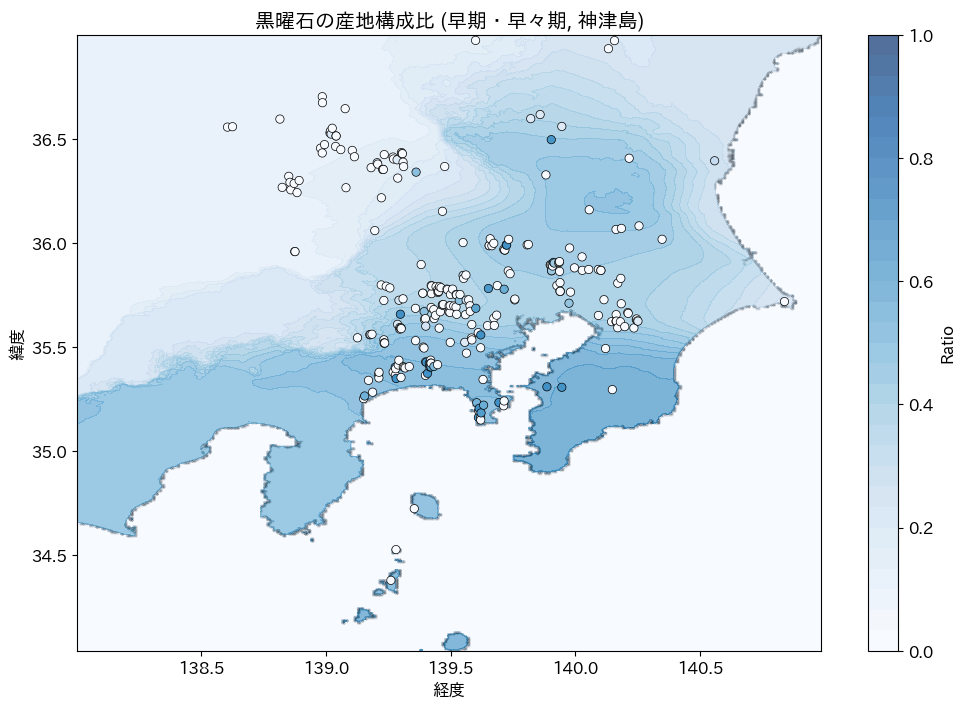

In [7]:
fig, ax = ObsidianVisualizer.plot_ratio_map(
    preprocessor.df_elevation,
    preprocessor.df_sites,
    target_period,
    target_origin,
    config.time_periods,
)
plt.show()

In [8]:
preprocessor.df_elevation

grid_x,x,grid_y,y,mesh_code_5th,average_elevation,maximum_elevation,minimum_elevation,minimum_elevation_code,maximum_slope_angle,maximum_slope_direction,minimum_slope_angle,minimum_slope_direction,average_slope_angle,geometry,is_sea,walking_velocity,travel_time,elevation_diff_east,angle_east,walking_velocity_east,travel_time_east,elevation_diff_west,angle_west,walking_velocity_west,travel_time_west,elevation_diff_north,angle_north,walking_velocity_north,travel_time_north,elevation_diff_south,angle_south,walking_velocity_south,travel_time_south,cost_kouzu,cost_shinshu,cost_hakone,cost_takahara,cost_river,x_meter,y_meter,is_valid,ratio_0_神津島,ratio_0_信州,ratio_0_箱根,ratio_0_高原山,ratio_1_神津島,ratio_1_信州,ratio_1_箱根,ratio_1_高原山,ratio_2_神津島,ratio_2_信州,ratio_2_箱根,ratio_2_高原山,ratio_3_神津島,ratio_3_信州,ratio_3_箱根,ratio_3_高原山,ratio_4_神津島,ratio_4_信州,ratio_4_箱根,ratio_4_高原山
i64,f64,i64,f64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,str,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,138.001563,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1802.795286,5316.893071,3314.682118,7153.033631,1144.879036,223191.926513,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
1,138.004688,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1798.93893,5313.036715,3310.825763,7149.177275,1147.923045,223480.517367,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2,138.007812,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1795.082575,5309.18036,3306.969407,7145.32092,1144.543792,223769.107912,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
3,138.010938,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1791.226219,5305.324005,3303.113052,7141.464564,1140.687437,224057.698149,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
4,138.014063,0,34.042708,null,null,null,null,null,null,null,null,null,null,null,true,4.0,3.856355,null,null,4.0,4.246055,null,null,4.0,4.246055,null,null,4.0,3.466656,null,null,4.0,3.466656,1787.369864,5301.467649,3299.256696,7137.608209,1136.831081,224346.288077,3.7709e6,false,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
951,140.973438,1419,36.998958,5540379744,30.6,52.1,13.0,0,13.5,1,1.9,2,7.2,"""POLYGON ((140.97187500001107 3…",false,3.236869,4.765537,-10.7,-2.164738,5.749189,2.954194,13.2,2.669855,4.278272,3.969879,null,null,4.0,3.466656,-5.7,-1.41283,5.490843,2.525409,6592.258542,5044.072927,4927.340657,2540.672507,25.072812,497636.540956,4.0948e6,false,0.25,0.25,0.25,0.25,0.125018,0.125001,0.125,0.624981,0.125739,0.125089,0.125082,0.624089,0.222855,0.266614,0.12656,0.383971,0.135691,0.501562,0.135647,0.227101
952,140.976563,1419,36.998958,5540379833,19.9,49.4,6.2,0,16.1,4,0.5,4,7.5,"""POLYGON ((140.97500000001108 3…",false,3.177122,4.855156,-7.3,-1.477253,5.512508,3.081033,10.7,2.164738,4.412583,3.849043,null,null,4.0,3.466656,17.5,4.330252,3.864122,3.588557,6597.02408,5048.838464,4932.106194,2545.438044,29.838349,497914.594966,4.0948e6,false,0.25,0.25,0.25,0.25,0.125

## 8. 事後分布からのサンプリング

In [9]:
# 事後分布からサンプリング
print("事後分布からサンプリング中...")

samples = bayes_nw.sample_posterior(
    preprocessor, target_period, target_origin, n_samples=1000
)

print("サンプリング完了:")
print(f"  グリッドサンプル形状: {samples['samples_grid'].shape}")
if samples["samples_sites"].ndim > 1:
    print(f"  遺跡サンプル形状: {samples['samples_sites'].shape}")

# サンプルの統計を表示
grid_samples = samples["samples_grid"]
if grid_samples.ndim == 3:
    # (n_samples, n_points, n_sources) の場合
    sample_means = grid_samples.mean(axis=(0, 1))  # 全点・全サンプルの平均
    sample_stds = grid_samples.std(axis=0).mean(axis=0)  # 平均標準偏差
else:
    # (n_samples, n_sources) の場合
    sample_means = grid_samples.mean(axis=0)
    sample_stds = grid_samples.std(axis=0)

sources = ["神津島", "信州", "箱根", "高原山"]
print("\n全産地のサンプル統計:")
for i, source in enumerate(sources):
    print(f"  {source}: 平均={sample_means[i]:.4f}, 標準偏差={sample_stds[i]:.4f}")

事後分布からサンプリング中...


遺跡サンプリング: 100%|██████████| 274/274 [00:00<00:00, 4446.92it/s]


サンプリング完了:
  グリッドサンプル形状: (1000, 1357520, 4)
  遺跡サンプル形状: (1000, 274, 4)

全産地のサンプル統計:
  神津島: 平均=0.2857, 標準偏差=0.0043
  信州: 平均=0.3290, 標準偏差=0.0044
  箱根: 平均=0.1941, 標準偏差=0.0039
  高原山: 平均=0.1911, 標準偏差=0.0039


In [11]:
samples.keys()

dict_keys(['samples_grid', 'samples_sites', 'target_idx', 'sources'])

In [12]:
samples["samples_grid"].shape

(1000, 1357520, 4)

In [16]:
max_index = samples["samples_grid"][:, :, 0].mean(axis=0).argmax()
max_index

493052

(array([ 1.,  1.,  0.,  2.,  2.,  0.,  1.,  1.,  3.,  1.,  3.,  0.,  1.,
         1.,  2.,  3.,  4.,  3.,  5.,  7.,  5.,  5.,  6.,  8.,  8.,  8.,
        10., 13., 10., 10., 19.,  7., 18., 19., 17., 11., 19., 16., 16.,
        22., 29., 19., 27., 30., 21., 22., 32., 20., 22., 23., 28., 27.,
        25., 27., 22., 25., 18., 25., 20., 14., 17., 22., 14., 18., 22.,
         5., 13., 15., 16.,  9.,  8.,  4.,  4.,  8.,  7.,  6.,  6.,  4.,
         6.,  4.,  2.,  2.,  4.,  3.,  1.,  5.,  1.,  0.,  1.,  1.,  2.,
         0.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  1.]),
 array([0.60468294, 0.60498407, 0.60528521, 0.60558634, 0.60588747,
        0.60618861, 0.60648974, 0.60679087, 0.607092  , 0.60739314,
        0.60769427, 0.6079954 , 0.60829653, 0.60859767, 0.6088988 ,
        0.60919993, 0.60950107, 0.6098022 , 0.61010333, 0.61040446,
        0.6107056 , 0.61100673, 0.61130786, 0.61160899, 0.61191013,
        0.61221126, 0.61251239, 0.61281353, 0.61311466, 0.61341579,
        0.61371692, 0.6140

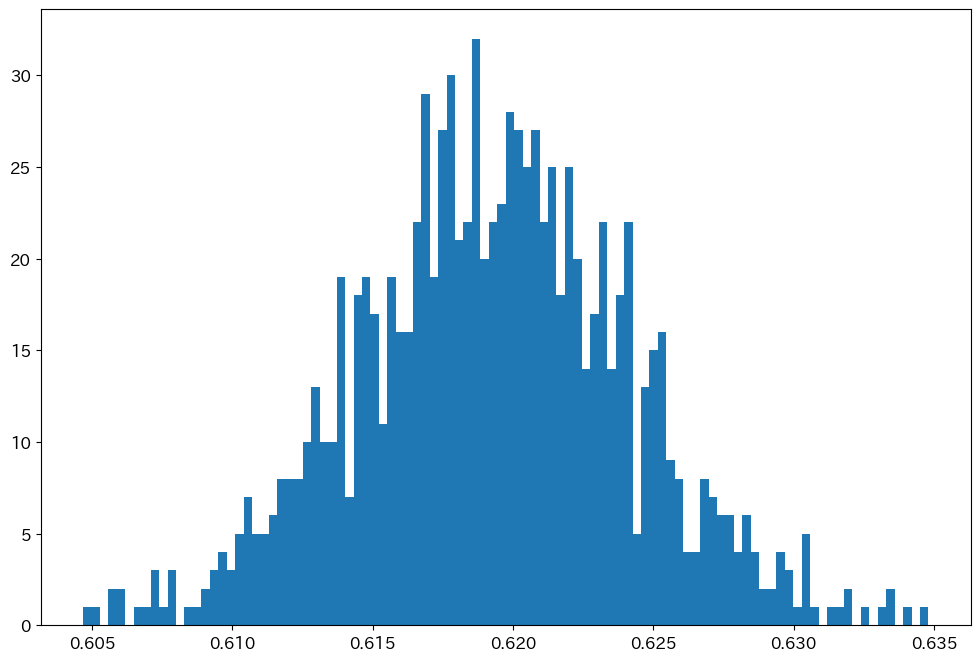

In [19]:
plt.hist(samples["samples_grid"][:, max_index, 0], bins=100)

In [1]:
13 / 60

0.21666666666666667

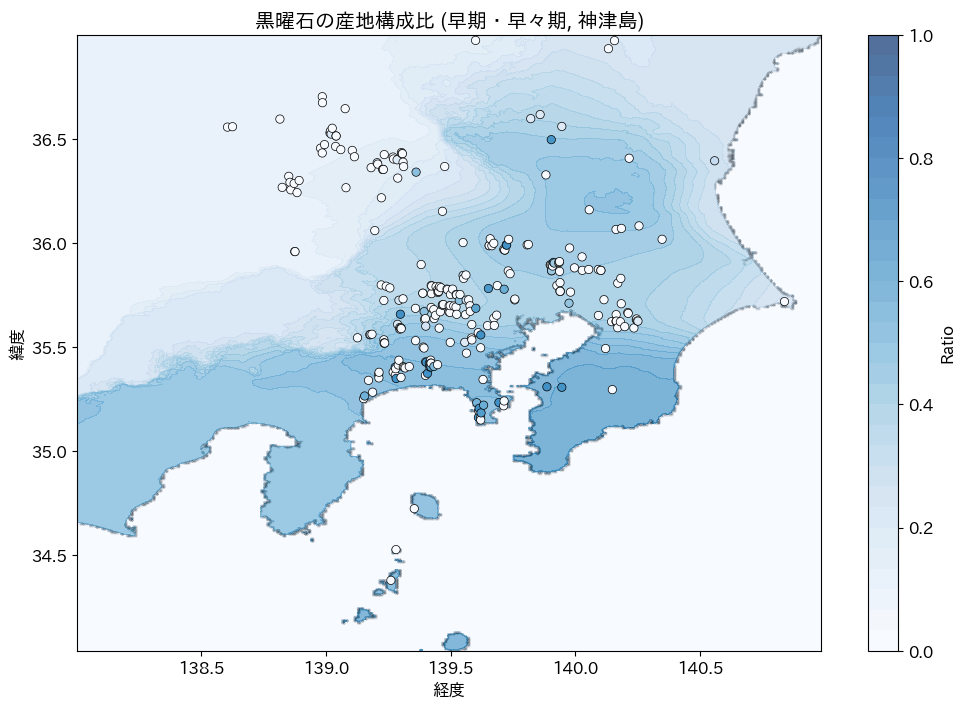

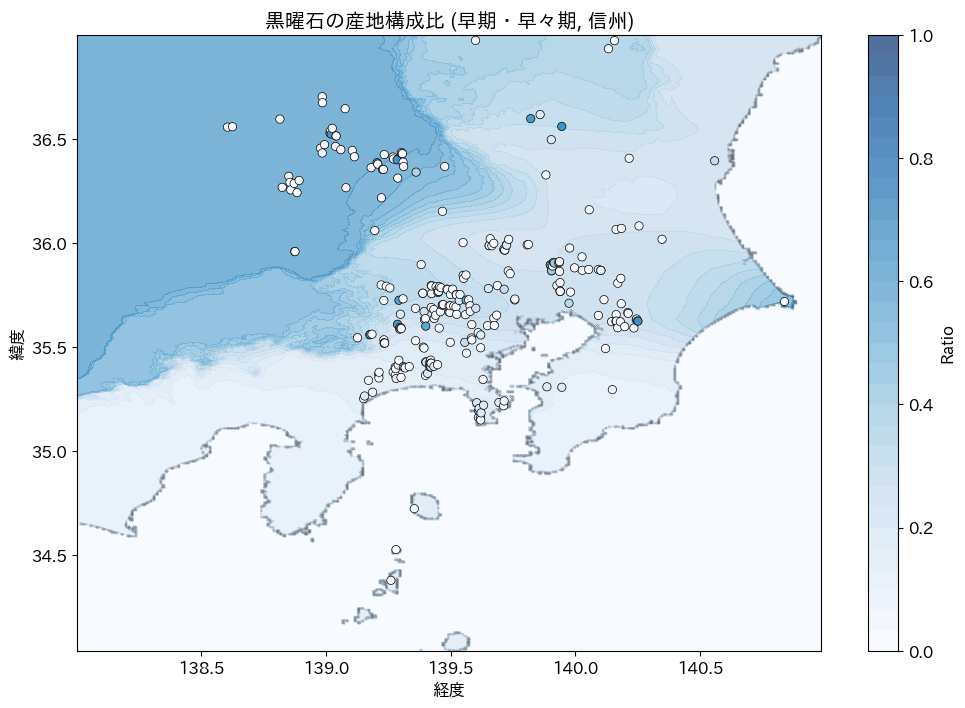

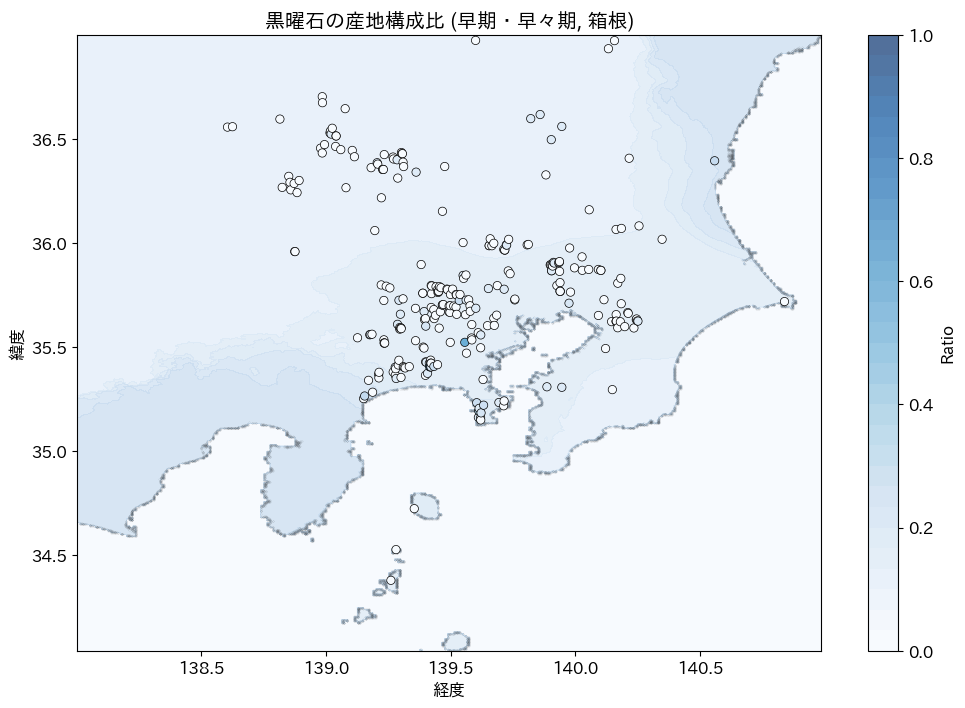

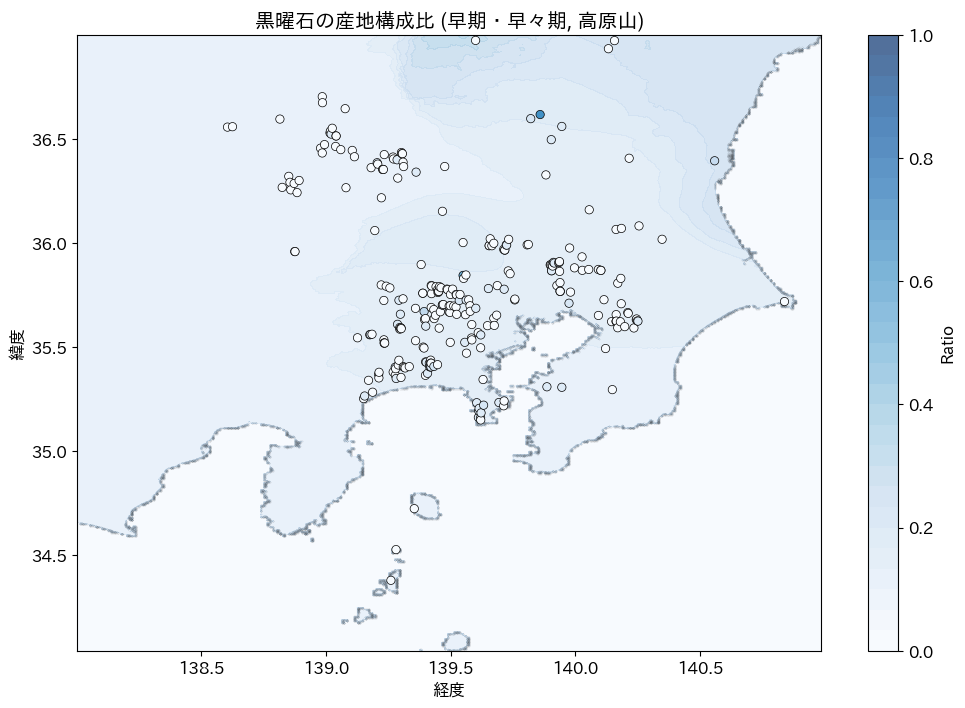

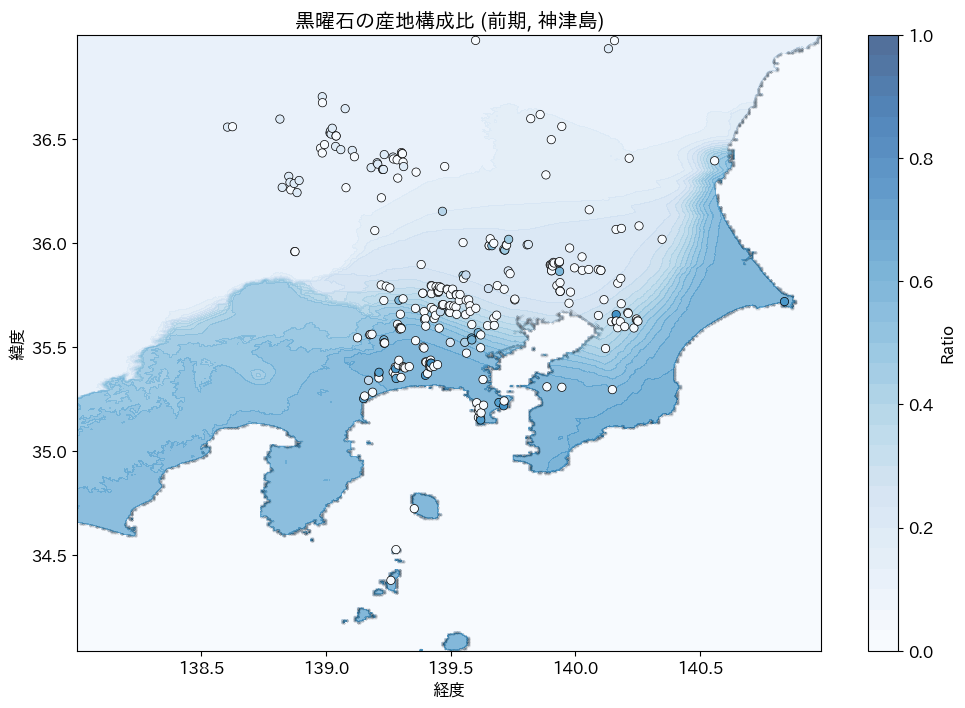

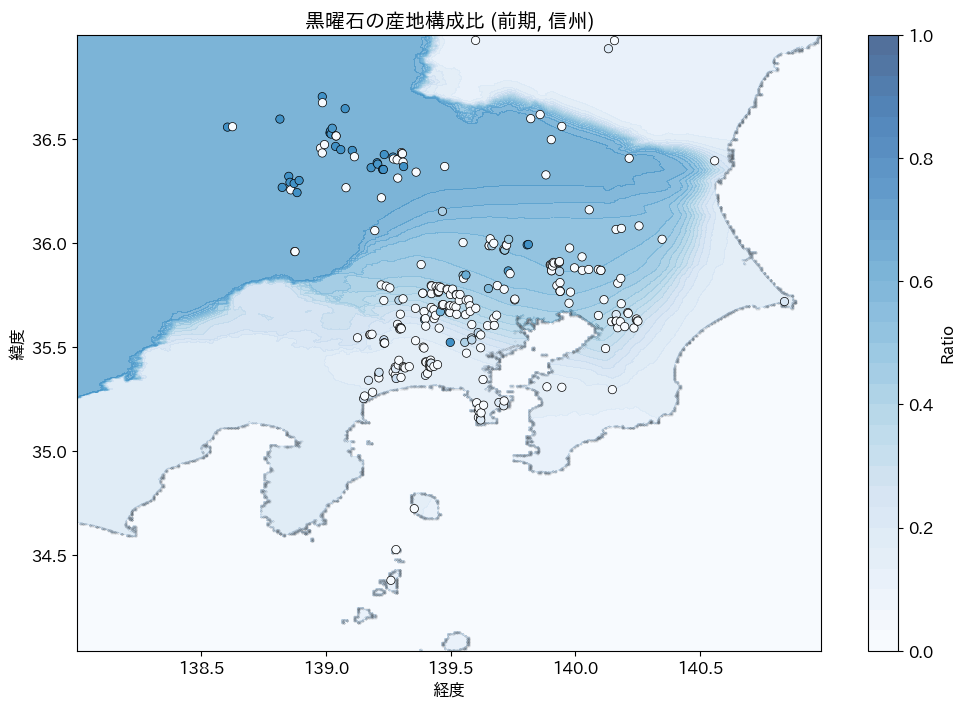

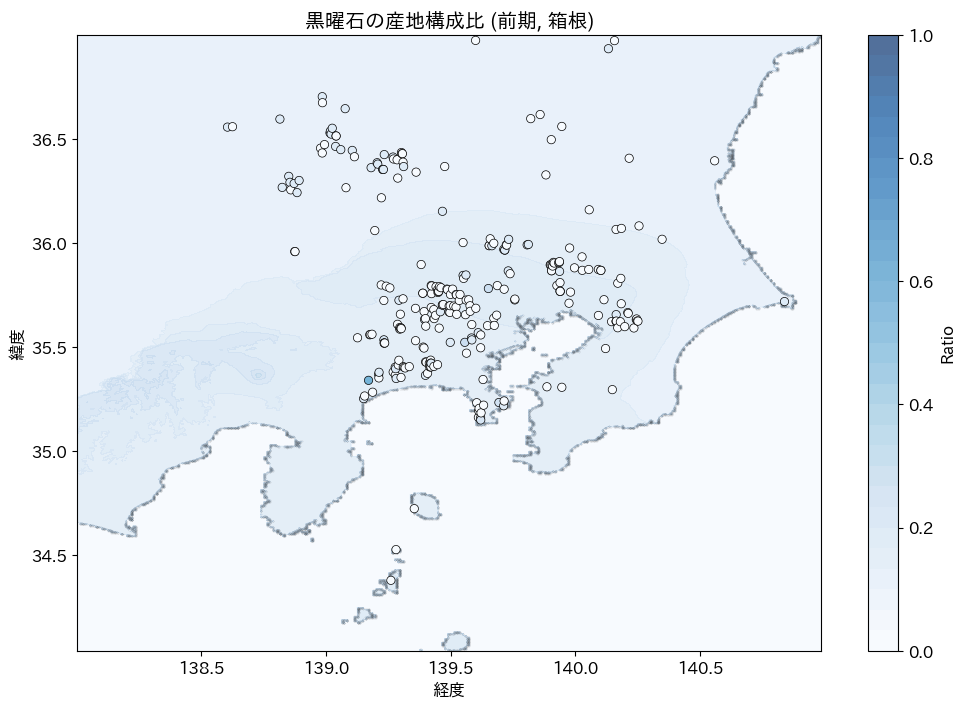

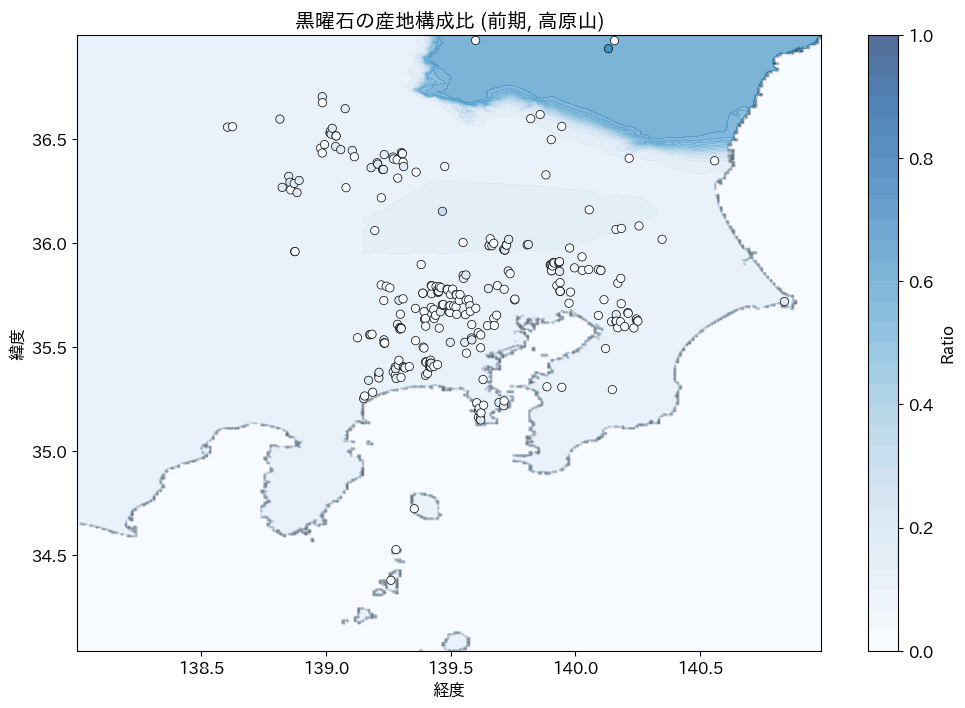

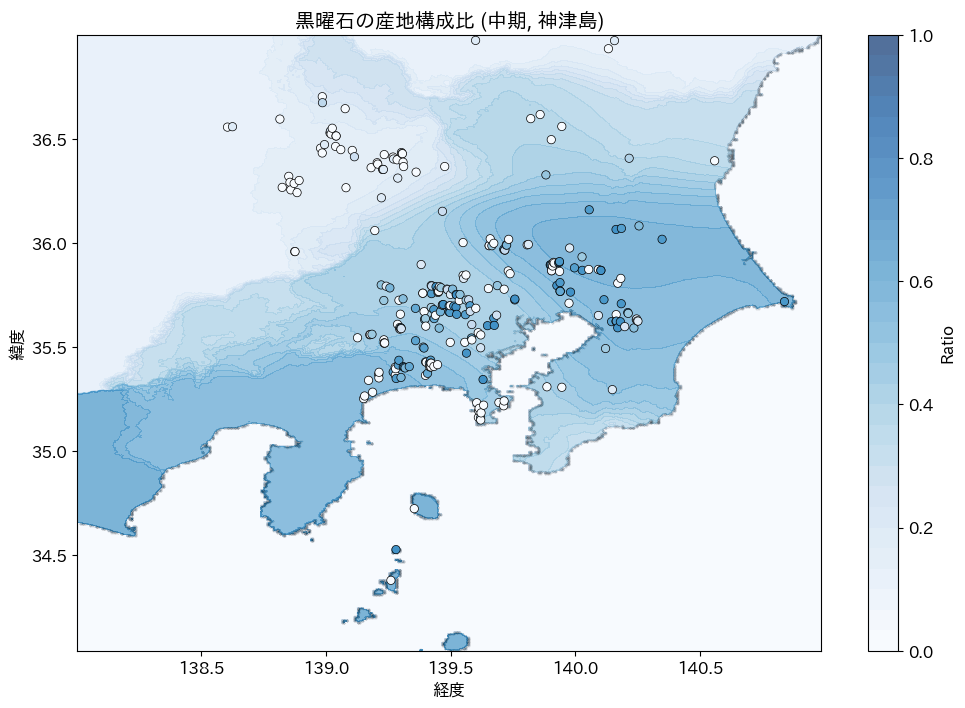

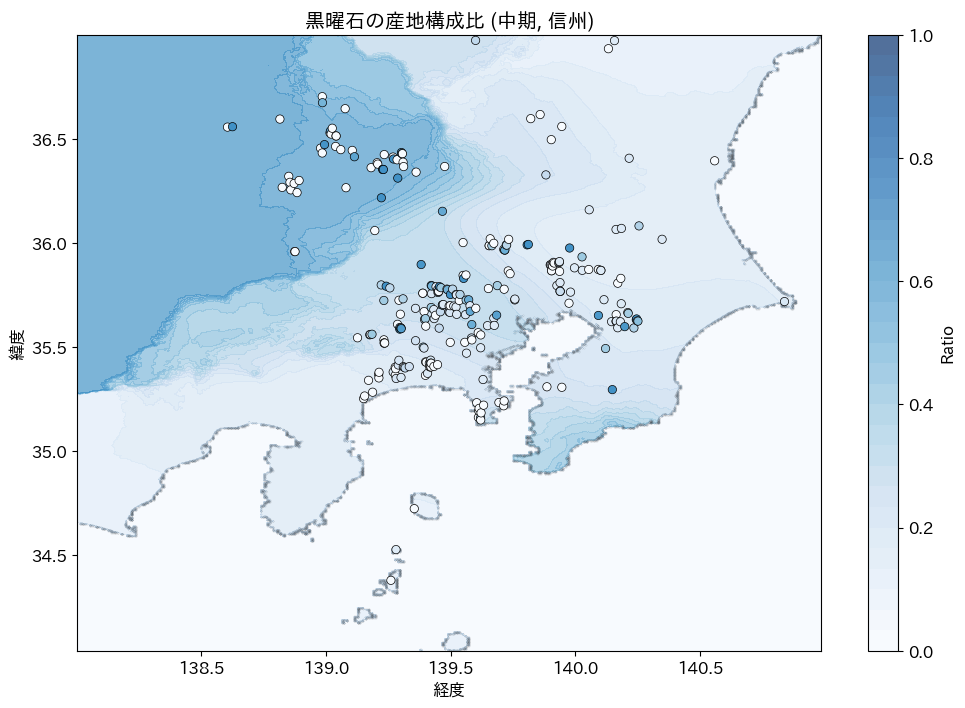

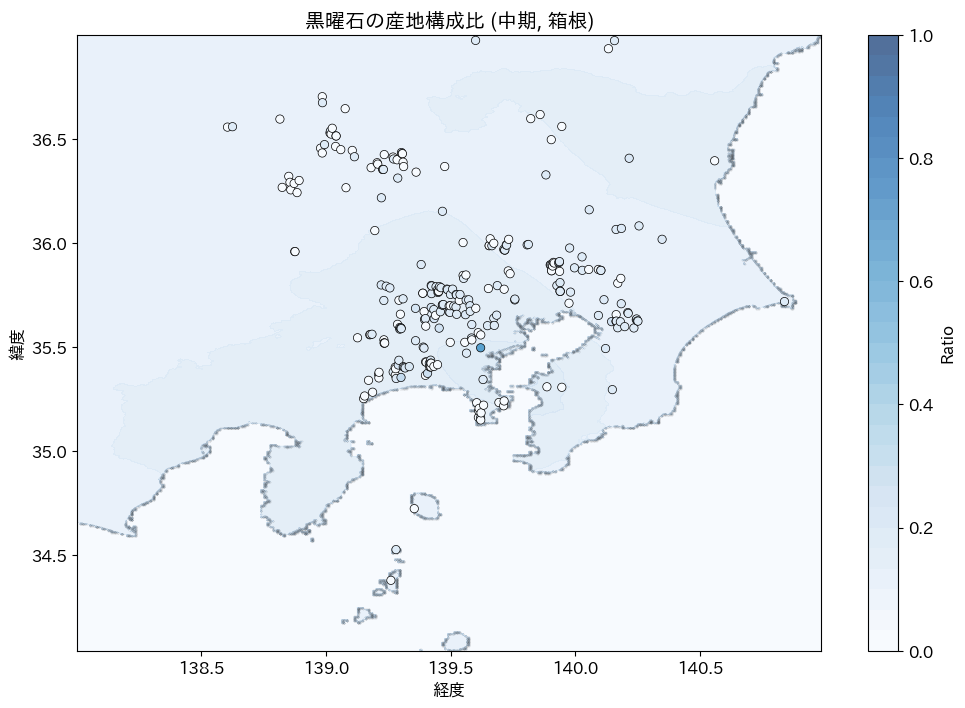

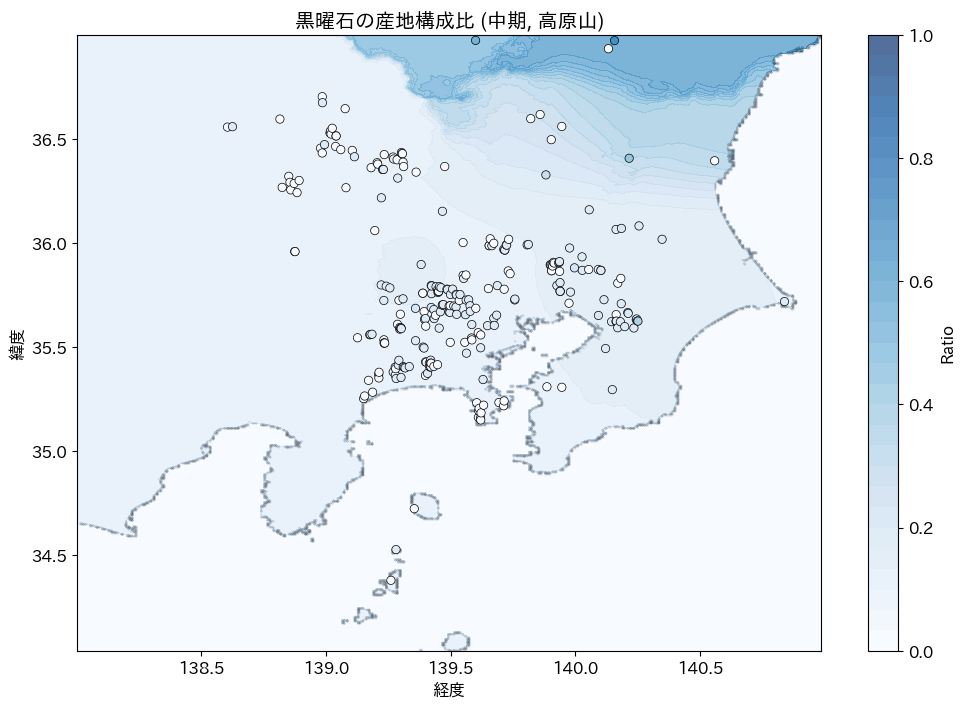

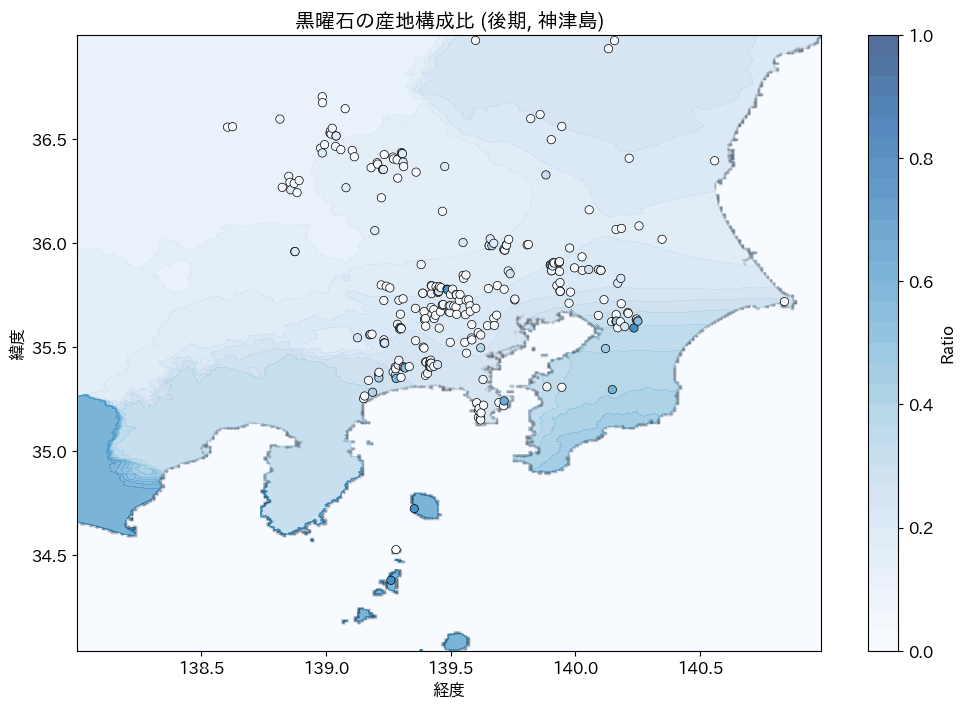

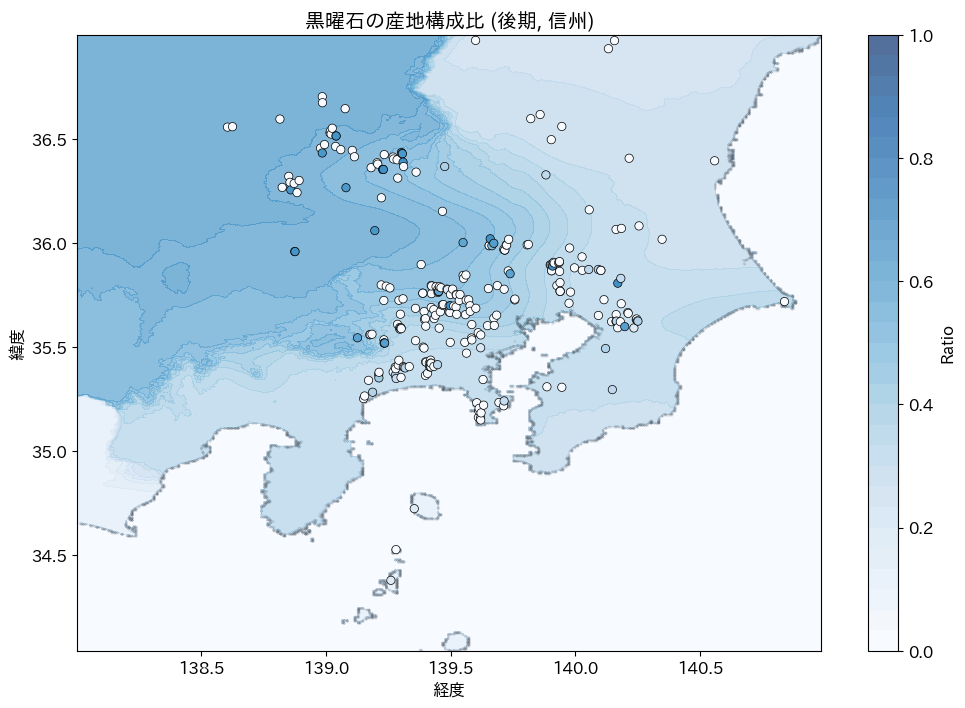

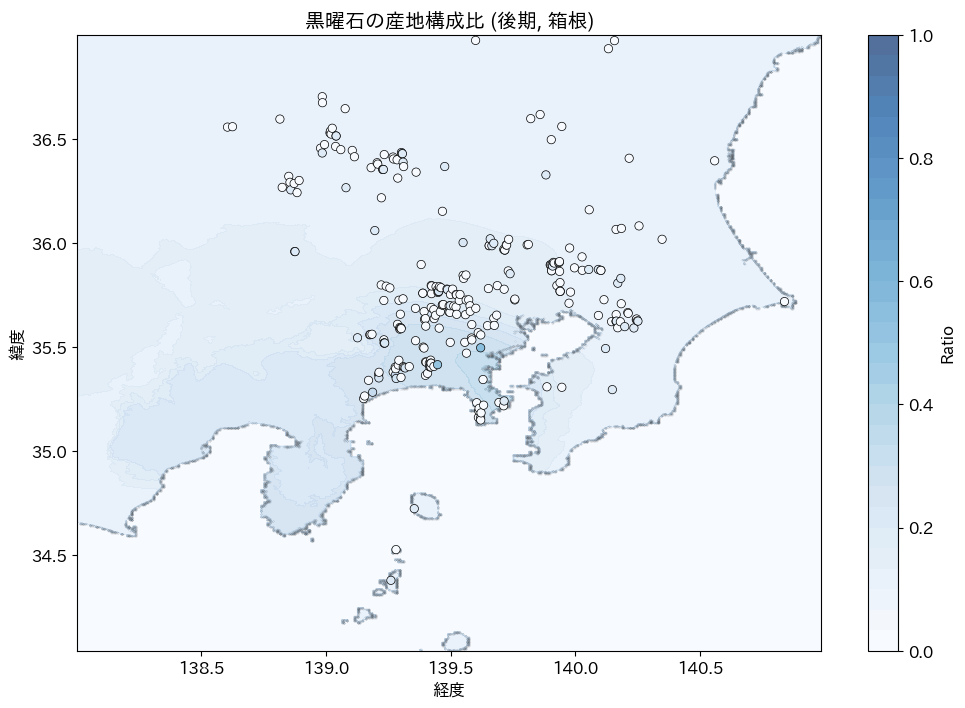

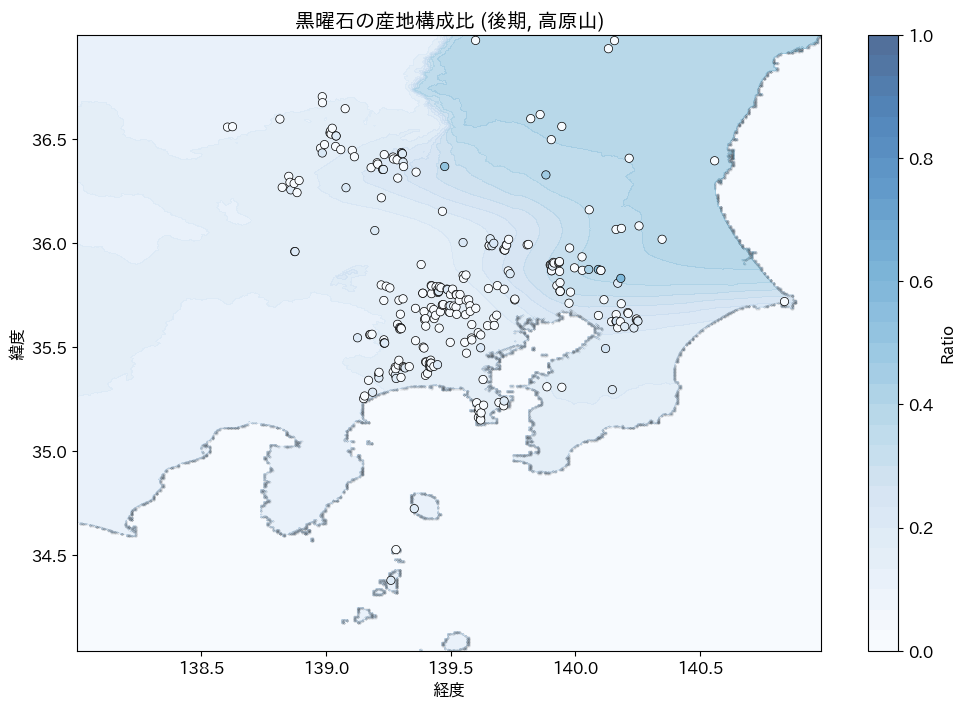

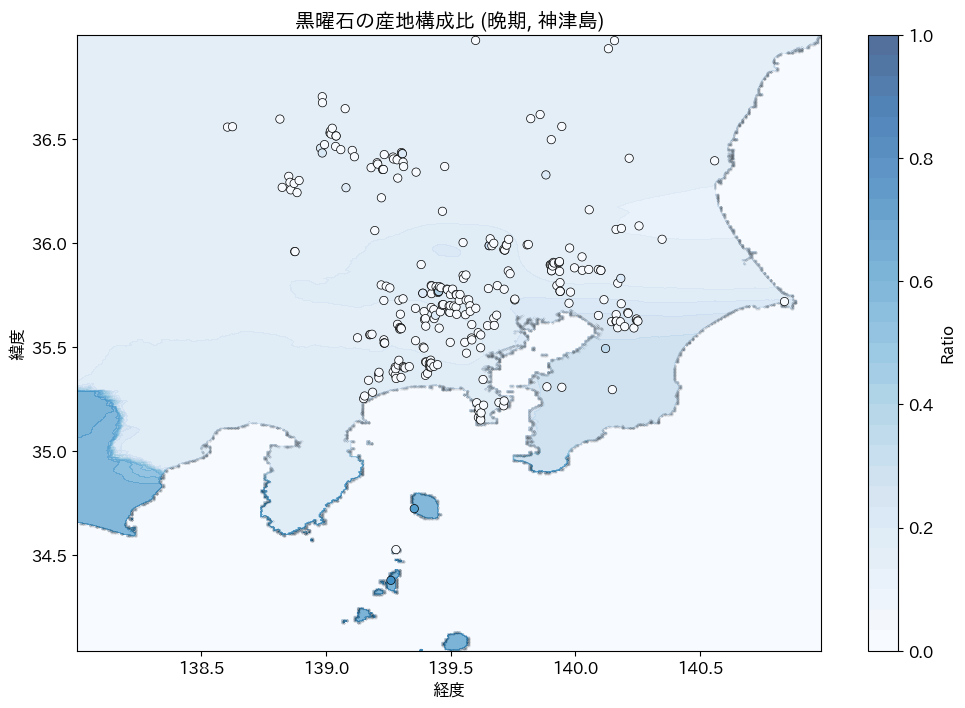

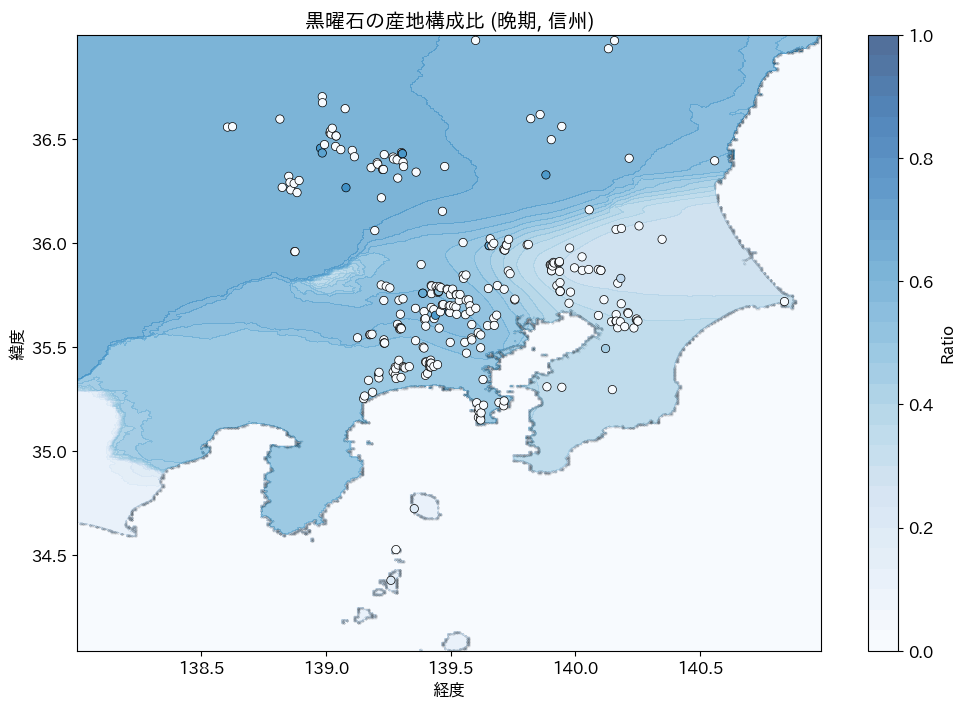

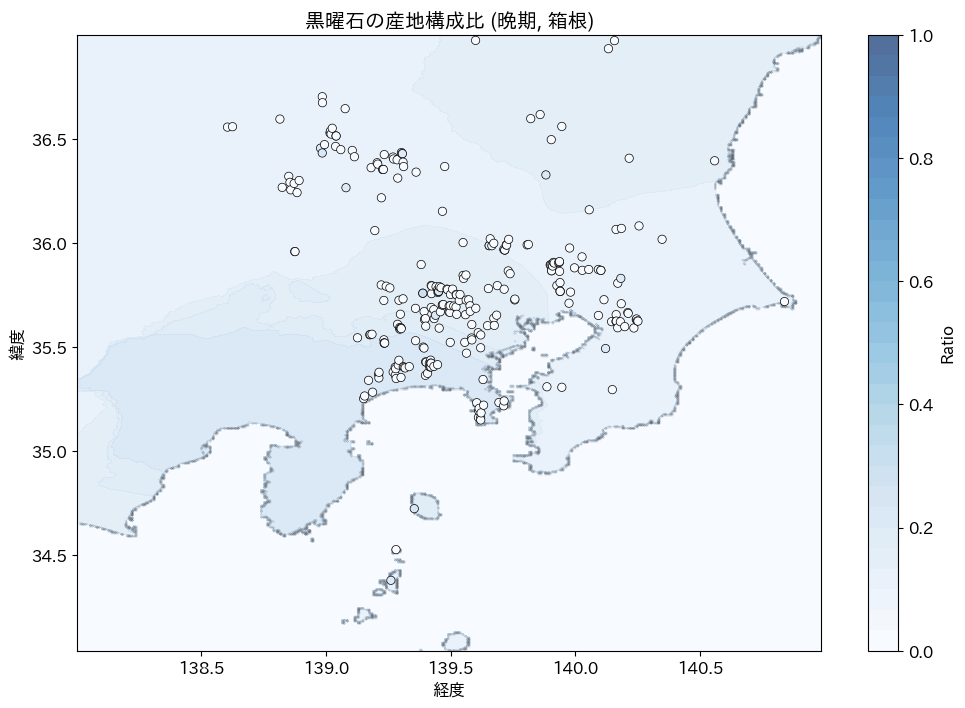

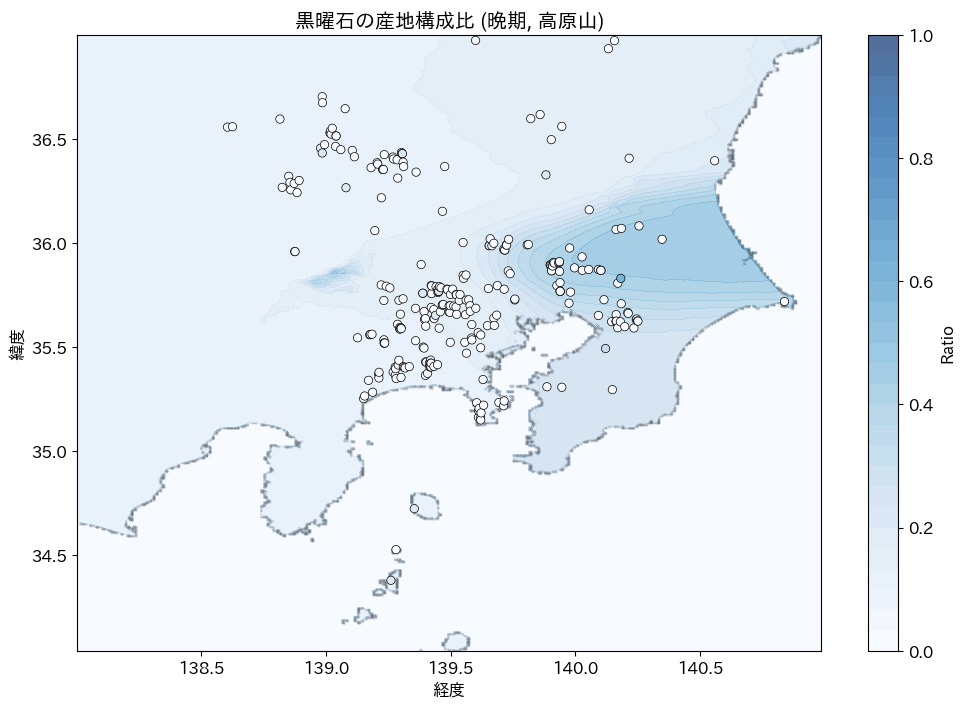

In [10]:
# 全時期・全産地の図を生成（保存はしない）
ObsidianVisualizer.plot_all_periods_origins(
    preprocessor.df_elevation,
    preprocessor.df_sites,
    config.time_periods,
    config.origins,
    save_dir=None,  # Noneにすると表示のみ
)